# Liver Disease Classification
## Machine Learning Assignment 4A

---

## Objective
This notebook implements classification of liver disease using three different approaches:
1. **Logistic Regression** - Probabilistic approach
2. **Hard Margin SVM** - Strict geometric separation
3. **Soft Margin SVM** - Flexible geometric separation

**Dataset:** Indian Liver Patient Dataset (ILPD)

**Goal:** Compare the performance of these three classification methods on real medical data.

---
## Step 1: Import Required Libraries

We'll import all necessary libraries for:
- Data manipulation (numpy, pandas)
- Machine learning models (scikit-learn)
- Visualization (matplotlib, seaborn)
- Model evaluation (metrics)

In [1]:
# Data manipulation and numerical operations
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


---
## Step 2: Load and Explore the Dataset

The **Indian Liver Patient Dataset** contains:
- **583 patient records**
- **10 features** (blood test markers)
- **1 target variable** (liver disease or healthy)

### Features:
1. Age
2. Gender
3. Total Bilirubin
4. Direct Bilirubin
5. Alkaline Phosphotase
6. Alamine Aminotransferase (ALT)
7. Aspartate Aminotransferase (AST)
8. Total Proteins
9. Albumin
10. Albumin/Globulin Ratio

In [2]:
# Load the dataset
df = pd.read_csv('indian_liver_patient.csv')

print("="*60)
print("DATASET LOADED")
print("="*60)
print(f"Total samples: {len(df)}")
print(f"Total features: {len(df.columns) - 1}")
print()

# Display first few rows
print("First 5 rows:")
df.head()

DATASET LOADED
Total samples: 583
Total features: 10

First 5 rows:


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
# Dataset information
print("Dataset Information:")
print("="*60)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [4]:
# Statistical summary
print("Statistical Summary:")
print("="*60)
df.describe()

Statistical Summary:


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [5]:
# Check for missing values
print("Missing Values:")
print("="*60)
missing_values = df.isnull().sum()
print(missing_values)
print()
print(f"Total missing values: {missing_values.sum()}")

Missing Values:
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

Total missing values: 4


Class Distribution:
Dataset
1    416
2    167
Name: count, dtype: int64



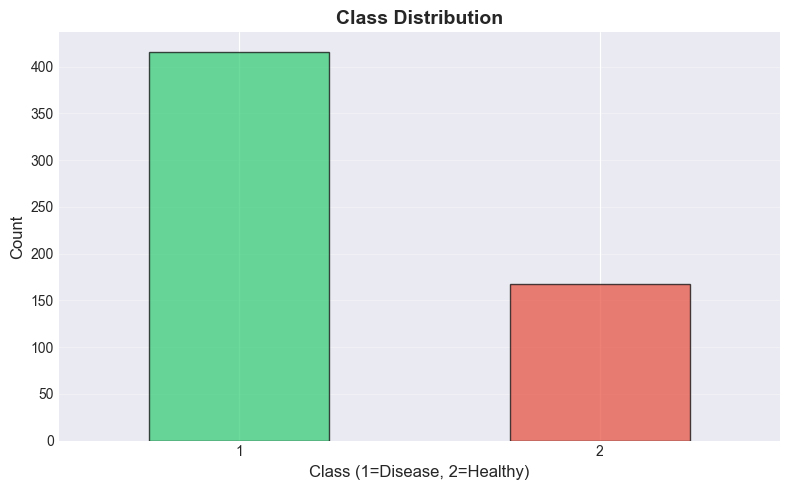

Liver Disease patients: 416 (71.4%)
Healthy patients: 167 (28.6%)


In [6]:
# Check class distribution
print("Class Distribution:")
print("="*60)
print(df['Dataset'].value_counts())
print()

# Visualize class distribution
plt.figure(figsize=(8, 5))
df['Dataset'].value_counts().plot(kind='bar', color=['#2ecc71', '#e74c3c'], alpha=0.7, edgecolor='black')
plt.title('Class Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Class (1=Disease, 2=Healthy)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Liver Disease patients: {(df['Dataset'] == 1).sum()} ({(df['Dataset'] == 1).sum()/len(df)*100:.1f}%)")
print(f"Healthy patients: {(df['Dataset'] == 2).sum()} ({(df['Dataset'] == 2).sum()/len(df)*100:.1f}%)")

---
## Step 3: Data Preprocessing

Before training models, we need to:
1. **Handle missing values** - Fill with median
2. **Encode categorical variables** - Convert Gender to numeric
3. **Standardize target labels** - Convert to 0 (healthy) and 1 (disease)

### Why preprocessing matters:
- Machine learning algorithms require numeric data
- Missing values cause errors
- Consistent labeling improves model training

In [11]:
print("PREPROCESSING DATA")
print("="*60)

# 1. Handle missing values
if df.isnull().sum().sum() > 0:
    print(f"✓ Found {df.isnull().sum().sum()} missing values")
    df.fillna(df.median(numeric_only=True), inplace=True)
    print("✓ Missing values filled with median")
else:
    print("✓ No missing values found")

print()

# 2. Convert Gender to numeric
print("Gender encoding:")
print(f"  Before: {df['Gender'].unique()}")
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
print(f"  After: {df['Gender'].unique()} (Male=1, Female=0)")
print("✓ Gender converted to numeric")

print()

# 3. Convert target variable
print("Target variable conversion:")
print(f"  Before: {df['Dataset'].unique()} (1=Disease, 2=Healthy)")
df['Dataset'] = df['Dataset'].map({1: 1, 2: 0})
print(f"  After: {df['Dataset'].unique()} (1=Disease, 0=Healthy)")
print("✓ Target variable standardized")

print()
print("Final Class Distribution:")
print(f"  Liver Disease (1): {(df['Dataset'] == 1).sum()}")
print(f"  Healthy (0): {(df['Dataset'] == 0).sum()}")

PREPROCESSING DATA
✓ Found 4 missing values
✓ Missing values filled with median

Gender encoding:
  Before: ['Female' 'Male']
  After: [0 1] (Male=1, Female=0)
✓ Gender converted to numeric

Target variable conversion:
  Before: [1 2] (1=Disease, 2=Healthy)
  After: [1 0] (1=Disease, 0=Healthy)
✓ Target variable standardized

Final Class Distribution:
  Liver Disease (1): 416
  Healthy (0): 167


---
## Step 4: Prepare Features and Split Data

### Actions:
1. **Separate features (X) and target (y)**
2. **Split into training (70%) and testing (30%) sets**
3. **Scale features** using StandardScaler

### Why feature scaling is critical:
- **SVM** is sensitive to feature magnitudes
- **Logistic Regression** converges faster with scaled features
- Ensures all features contribute equally to the model


In [12]:
print("PREPARING DATA FOR TRAINING")
print("="*60)

# Check if Gender is still string (in case preprocessing wasn't run)
if df['Gender'].dtype == 'object':
    print("⚠️  Warning: Gender column is still string type!")
    print("   Converting Gender to numeric now...")
    df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
    print("   ✓ Gender converted (Male=1, Female=0)")
    print()

# Check if Dataset needs conversion
if df['Dataset'].max() > 1:
    print("⚠️  Warning: Dataset column needs conversion!")
    print("   Converting Dataset labels now...")
    df['Dataset'] = df['Dataset'].map({1: 1, 2: 0})
    print("   ✓ Dataset converted (1=Disease, 0=Healthy)")
    print()

# Separate features and target
X = df.drop('Dataset', axis=1)
y = df['Dataset']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print()

# Verify all features are numeric
print("Checking data types:")
print(X.dtypes)
print()

# Split data (70-30 split with stratification)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Train-Test Split:")
print(f"  Training set: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"  Testing set: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")
print()

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Features scaled using StandardScaler")
print(f"  Mean after scaling: {X_train_scaled.mean():.6f}")
print(f"  Std after scaling: {X_train_scaled.std():.6f}")

PREPARING DATA FOR TRAINING
Features shape: (583, 10)
Target shape: (583,)

Checking data types:
Age                             int64
Gender                          int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
dtype: object

Train-Test Split:
  Training set: 408 samples (70.0%)
  Testing set: 175 samples (30.0%)

✓ Features scaled using StandardScaler
  Mean after scaling: 0.000000
  Std after scaling: 1.000000


---
## Step 5: Logistic Regression

### What is Logistic Regression?
- **Probabilistic classification** method
- Uses sigmoid function: $P(y=1|x) = \frac{1}{1 + e^{-(w^Tx + b)}}$
- Predicts probability of belonging to positive class
- Simple, interpretable, and effective for linearly separable data

### Why use it?
- Good baseline model
- Provides probability scores (useful for medical decisions)
- Fast training and prediction

In [14]:
import time  # For timing

print("="*60)
print("LOGISTIC REGRESSION")
print("="*60)

# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

print("Training started...")
start_time = time.time()

log_reg.fit(X_train_scaled, y_train)

training_time_log = time.time() - start_time
print(f"✓ Model trained successfully in {training_time_log:.4f} seconds")
print()

# Make predictions
y_pred_log = log_reg.predict(X_test_scaled)
y_pred_proba_log = log_reg.predict_proba(X_test_scaled)[:, 1]

# Evaluate
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

print("Performance Metrics:")
print("-" * 60)
print(f"  Accuracy:  {accuracy_log:.4f} ({accuracy_log*100:.2f}%)")
print(f"  Precision: {precision_log:.4f} ({precision_log*100:.2f}%)")
print(f"  Recall:    {recall_log:.4f} ({recall_log*100:.2f}%)")
print(f"  F1-Score:  {f1_log:.4f}")
print()

print("Classification Report:")
print("-" * 60)
print(classification_report(y_test, y_pred_log, target_names=['Healthy', 'Liver Disease']))

LOGISTIC REGRESSION
Training started...
✓ Model trained successfully in 0.0100 seconds

Performance Metrics:
------------------------------------------------------------
  Accuracy:  0.7371 (73.71%)
  Precision: 0.7484 (74.84%)
  Recall:    0.9520 (95.20%)
  F1-Score:  0.8380

Classification Report:
------------------------------------------------------------
               precision    recall  f1-score   support

      Healthy       0.62      0.20      0.30        50
Liver Disease       0.75      0.95      0.84       125

     accuracy                           0.74       175
    macro avg       0.69      0.58      0.57       175
 weighted avg       0.71      0.74      0.69       175



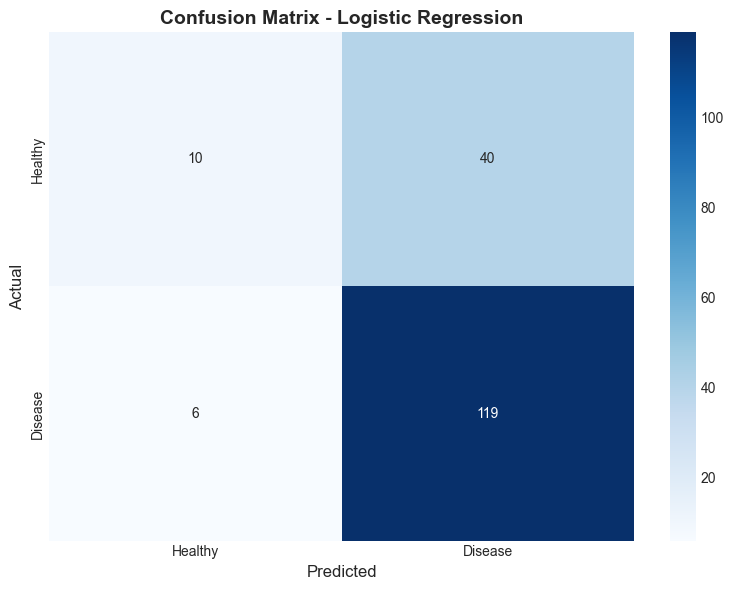

True Negatives:  10
False Positives: 40
False Negatives: 6
True Positives:  119


In [15]:
# Confusion Matrix Visualization
cm_log = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Healthy', 'Disease'],
            yticklabels=['Healthy', 'Disease'])
plt.title('Confusion Matrix - Logistic Regression', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

print(f"True Negatives:  {cm_log[0,0]}")
print(f"False Positives: {cm_log[0,1]}")
print(f"False Negatives: {cm_log[1,0]}")
print(f"True Positives:  {cm_log[1,1]}")

---
## Step 6: Hard Margin SVM

### What is Hard Margin SVM?
- **Geometric approach** to classification
- Finds the hyperplane that **maximally separates** classes
- **No misclassifications allowed** - all points must be correctly classified
- Constraint: $y_i(w^Tx_i + b) \geq 1$ for all training points

### Implementation:
- Use very large C value (C=1,000,000) to approximate hard margin
- C → ∞ means almost no tolerance for errors

### ⚠️ Why Hard Margin SVM is SLOW:
- **Much slower than Logistic Regression** (this is normal!)
- Solves complex quadratic programming problem (O(n²) to O(n³) complexity)
- With C=1e6, the optimizer works extremely hard to find zero-error solution
- Real medical data has overlap → no perfect solution exists
- The algorithm struggles and takes many iterations

### Limitations:
- ❌ Requires perfectly linearly separable data
- ❌ Very sensitive to noise and outliers
- ❌ May fail on real-world data with overlap
- ❌ **Computationally expensive** - can take minutes on small datasets

In [17]:
import time  # For timing

print("="*60)
print("HARD MARGIN SVM (C=1e6)")
print("="*60)
print("⚠️  This may take 1-3 minutes due to high computational complexity...")
print("    Hard Margin SVM is much slower than Logistic Regression (this is normal!)")
print()

# Train Hard Margin SVM
hard_svm = SVC(kernel='linear', C=1e6, random_state=42, max_iter=10000)

try:
    print("Training started...")
    start_time = time.time()
    
    hard_svm.fit(X_train_scaled, y_train)
    
    training_time = time.time() - start_time
    print(f"✓ Model trained successfully in {training_time:.2f} seconds")
    print()
    
    # Make predictions
    y_pred_hard = hard_svm.predict(X_test_scaled)
    
    # Evaluate
    accuracy_hard = accuracy_score(y_test, y_pred_hard)
    precision_hard = precision_score(y_test, y_pred_hard)
    recall_hard = recall_score(y_test, y_pred_hard)
    f1_hard = f1_score(y_test, y_pred_hard)
    
    print("Performance Metrics:")
    print("-" * 60)
    print(f"  Accuracy:  {accuracy_hard:.4f} ({accuracy_hard*100:.2f}%)")
    print(f"  Precision: {precision_hard:.4f} ({precision_hard*100:.2f}%)")
    print(f"  Recall:    {recall_hard:.4f} ({recall_hard*100:.2f}%)")
    print(f"  F1-Score:  {f1_hard:.4f}")
    print()
    
    print(f"Support Vectors: {hard_svm.n_support_}")
    print(f"  Class 0 (Healthy): {hard_svm.n_support_[0]}")
    print(f"  Class 1 (Disease): {hard_svm.n_support_[1]}")
    print(f"  Total: {sum(hard_svm.n_support_)}")
    print()
    
    print("Classification Report:")
    print("-" * 60)
    print(classification_report(y_test, y_pred_hard, target_names=['Healthy', 'Liver Disease']))
    
except Exception as e:
    print(f"⚠ Hard Margin SVM failed: {e}")
    print("This is expected if data is not perfectly linearly separable!")
    accuracy_hard = None
    y_pred_hard = None

HARD MARGIN SVM (C=1e6)
⚠️  This may take 1-3 minutes due to high computational complexity...
    Hard Margin SVM is much slower than Logistic Regression (this is normal!)

Training started...
✓ Model trained successfully in 0.03 seconds

Performance Metrics:
------------------------------------------------------------
  Accuracy:  0.6057 (60.57%)
  Precision: 0.7545 (75.45%)
  Recall:    0.6640 (66.40%)
  F1-Score:  0.7064

Support Vectors: [ 47 173]
  Class 0 (Healthy): 47
  Class 1 (Disease): 173
  Total: 220

Classification Report:
------------------------------------------------------------
               precision    recall  f1-score   support

      Healthy       0.35      0.46      0.40        50
Liver Disease       0.75      0.66      0.71       125

     accuracy                           0.61       175
    macro avg       0.55      0.56      0.55       175
 weighted avg       0.64      0.61      0.62       175



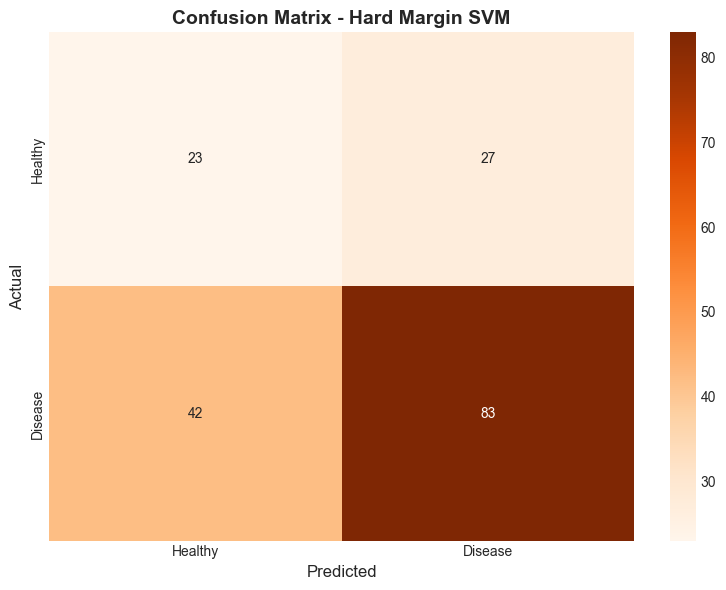

True Negatives:  23
False Positives: 27
False Negatives: 42
True Positives:  83


In [19]:
# Confusion Matrix for Hard Margin SVM
if y_pred_hard is not None:
    cm_hard = confusion_matrix(y_test, y_pred_hard)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_hard, annot=True, fmt='d', cmap='Oranges', cbar=True,
                xticklabels=['Healthy', 'Disease'],
                yticklabels=['Healthy', 'Disease'])
    plt.title('Confusion Matrix - Hard Margin SVM', fontsize=14, fontweight='bold')
    plt.ylabel('Actual', fontsize=12)
    plt.xlabel('Predicted', fontsize=12)
    plt.tight_layout()
    plt.show()
    
    print(f"True Negatives:  {cm_hard[0,0]}")
    print(f"False Positives: {cm_hard[0,1]}")
    print(f"False Negatives: {cm_hard[1,0]}")
    print(f"True Positives:  {cm_hard[1,1]}")

---
## Step 7: Soft Margin SVM (Multiple C Values)

### What is Soft Margin SVM?
- **Flexible approach** that allows some misclassifications
- Introduces **slack variables** (ξ) to permit errors
- Constraint: $y_i(w^Tx_i + b) \geq 1 - \xi_i$ where $\xi_i \geq 0$

### The C Parameter:
Controls the trade-off between margin width and classification errors:
- **Small C (e.g., 0.1)**: More tolerance for errors, wider margin, better generalization
- **Large C (e.g., 100)**: Less tolerance for errors, narrower margin, closer to hard margin

### Why it's better for real-world data:
- ✅ Handles overlapping classes
- ✅ Robust to noise and outliers
- ✅ More practical than hard margin

In [20]:
print("="*60)
print("SOFT MARGIN SVM (Various C Values)")
print("="*60)

# Test different C values
C_values = [0.1, 1, 10, 100]
soft_svm_results = {}

for C in C_values:
    print(f"\nTraining with C = {C}...")
    print("-" * 60)
    
    # Train Soft Margin SVM
    soft_svm = SVC(kernel='linear', C=C, random_state=42)
    soft_svm.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred_soft = soft_svm.predict(X_test_scaled)
    
    # Evaluate
    accuracy_soft = accuracy_score(y_test, y_pred_soft)
    precision_soft = precision_score(y_test, y_pred_soft)
    recall_soft = recall_score(y_test, y_pred_soft)
    f1_soft = f1_score(y_test, y_pred_soft)
    
    # Store results
    soft_svm_results[C] = {
        'model': soft_svm,
        'predictions': y_pred_soft,
        'accuracy': accuracy_soft,
        'precision': precision_soft,
        'recall': recall_soft,
        'f1': f1_soft,
        'n_support': soft_svm.n_support_
    }
    
    print(f"  Accuracy:  {accuracy_soft:.4f} ({accuracy_soft*100:.2f}%)")
    print(f"  Precision: {precision_soft:.4f} ({precision_soft*100:.2f}%)")
    print(f"  Recall:    {recall_soft:.4f} ({recall_soft*100:.2f}%)")
    print(f"  F1-Score:  {f1_soft:.4f}")
    print(f"  Support Vectors: {soft_svm.n_support_} (Total: {sum(soft_svm.n_support_)})")

print("\n" + "="*60)
print("✓ All Soft Margin SVM models trained successfully")
print("="*60)

SOFT MARGIN SVM (Various C Values)

Training with C = 0.1...
------------------------------------------------------------
  Accuracy:  0.7143 (71.43%)
  Precision: 0.7143 (71.43%)
  Recall:    1.0000 (100.00%)
  F1-Score:  0.8333
  Support Vectors: [117 143] (Total: 260)

Training with C = 1...
------------------------------------------------------------
  Accuracy:  0.7143 (71.43%)
  Precision: 0.7143 (71.43%)
  Recall:    1.0000 (100.00%)
  F1-Score:  0.8333
  Support Vectors: [117 142] (Total: 259)

Training with C = 10...
------------------------------------------------------------
  Accuracy:  0.7143 (71.43%)
  Precision: 0.7143 (71.43%)
  Recall:    1.0000 (100.00%)
  F1-Score:  0.8333
  Support Vectors: [117 156] (Total: 273)

Training with C = 100...
------------------------------------------------------------
  Accuracy:  0.7143 (71.43%)
  Precision: 0.7143 (71.43%)
  Recall:    1.0000 (100.00%)
  F1-Score:  0.8333
  Support Vectors: [117 161] (Total: 278)

✓ All Soft Margin S

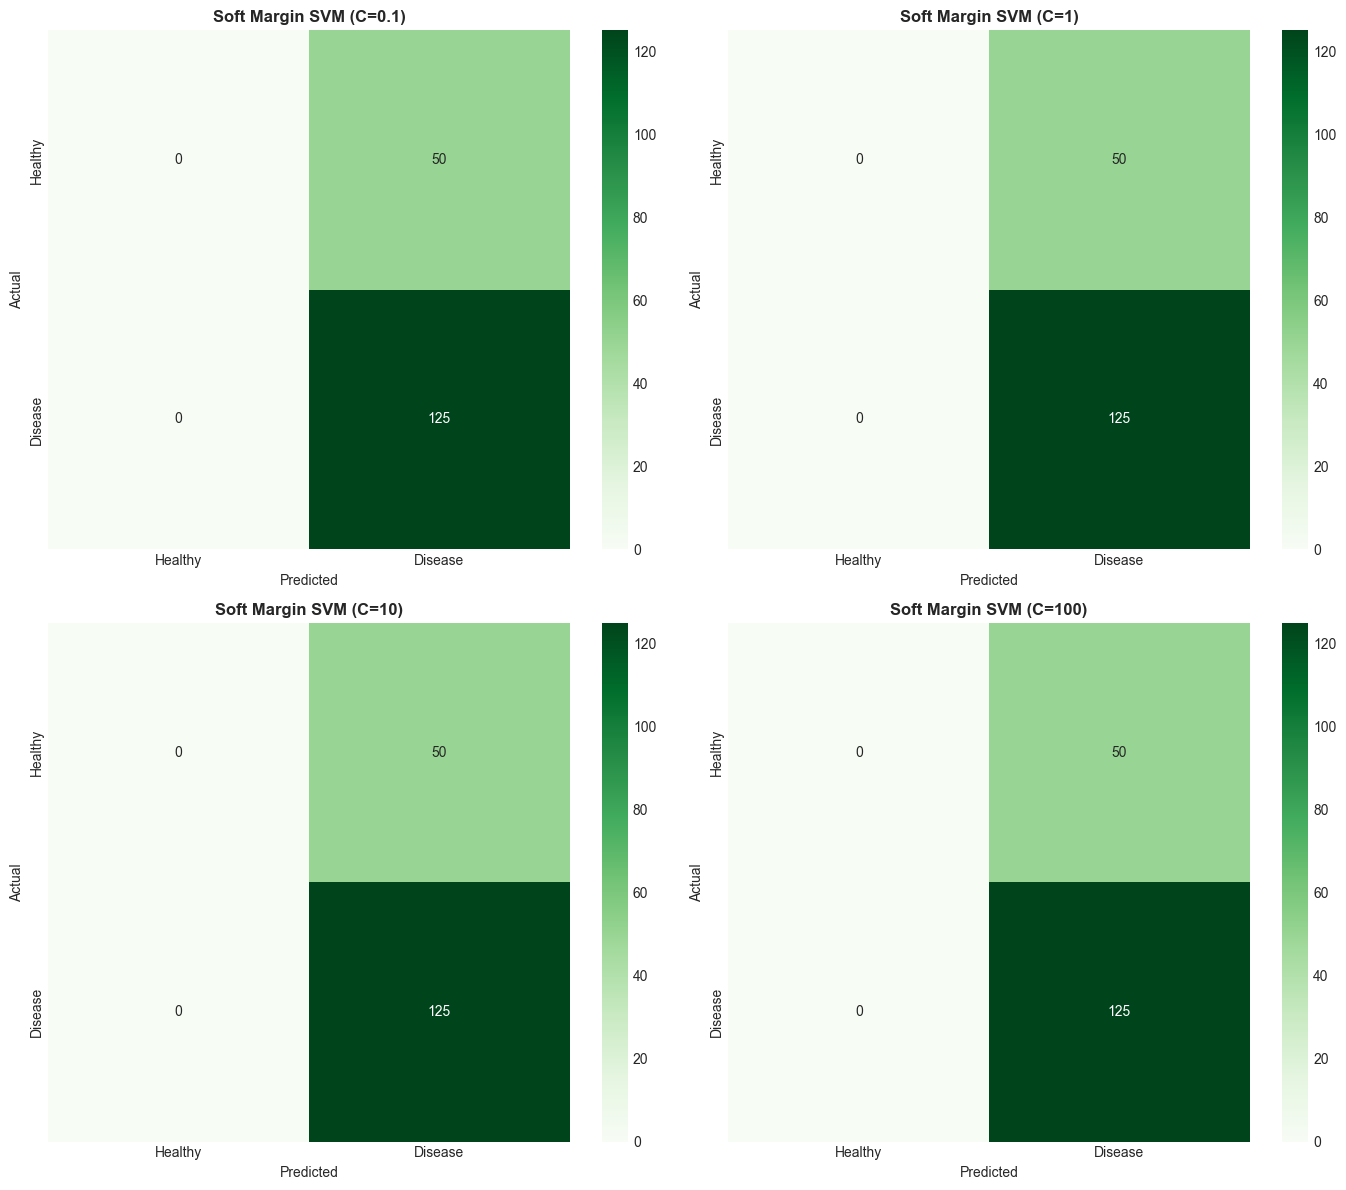

✓ Confusion matrices saved as 'confusion_matrices_soft_svm.png'


In [21]:
# Visualize Confusion Matrices for all C values
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for idx, C in enumerate(C_values):
    cm = confusion_matrix(y_test, soft_svm_results[C]['predictions'])
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=True,
                xticklabels=['Healthy', 'Disease'],
                yticklabels=['Healthy', 'Disease'],
                ax=axes[idx])
    axes[idx].set_title(f'Soft Margin SVM (C={C})', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Actual', fontsize=10)
    axes[idx].set_xlabel('Predicted', fontsize=10)

plt.tight_layout()
plt.savefig('confusion_matrices_soft_svm.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Confusion matrices saved as 'confusion_matrices_soft_svm.png'")

---
## Step 7B: Exploring Different SVM Kernels

So far we've only used **linear kernels** which find straight-line decision boundaries. But what if the relationship between features and disease is **non-linear**?

### 🔍 SVM Kernel Types:

1. **Linear Kernel:** `K(x, y) = x^T y`
   - Finds straight-line boundaries
   - Fast, simple
   - Best for linearly separable data

2. **RBF (Radial Basis Function) Kernel:** `K(x, y) = exp(-γ ||x - y||²)`
   - Creates circular/curved boundaries
   - Most popular kernel
   - Can model complex non-linear patterns
   - **Two parameters:** C (margin) and γ (gamma - how far influence of single point reaches)

3. **Polynomial Kernel:** `K(x, y) = (x^T y + r)^d`
   - Creates polynomial decision boundaries
   - Parameter `d` = degree (2 = quadratic, 3 = cubic, etc.)
   - Good for data with polynomial relationships

4. **Sigmoid Kernel:** `K(x, y) = tanh(α x^T y + c)`
   - Similar to neural network activation
   - Less commonly used

### 🎯 Why Try Different Kernels?

Our linear models achieved ~70-74% accuracy. Non-linear kernels might capture complex patterns that linear boundaries miss!

**Let's test RBF and Polynomial kernels to see if we can improve performance.**

In [25]:
import time

print("="*70)
print("TESTING DIFFERENT SVM KERNELS")
print("="*70)
print()

# Define kernels to test
kernels_config = {
    'Linear': {'kernel': 'linear', 'C': 1},
    'RBF (γ=auto)': {'kernel': 'rbf', 'C': 1, 'gamma': 'auto'},
    'RBF (γ=0.1)': {'kernel': 'rbf', 'C': 1, 'gamma': 0.1},
    'RBF (γ=1)': {'kernel': 'rbf', 'C': 1, 'gamma': 1},
    'Polynomial (degree=2)': {'kernel': 'poly', 'C': 1, 'degree': 2, 'gamma': 'auto'},
    'Polynomial (degree=3)': {'kernel': 'poly', 'C': 1, 'degree': 3, 'gamma': 'auto'},
}

# Store results
kernel_results = {}

for name, params in kernels_config.items():
    print(f"\n{'='*70}")
    print(f"Training: {name}")
    print(f"Parameters: {params}")
    print('-'*70)
    
    # Train model
    start_time = time.time()
    svm_model = SVC(**params, random_state=42, max_iter=10000)
    svm_model.fit(X_train_scaled, y_train)
    training_time = time.time() - start_time
    
    # Make predictions
    y_pred = svm_model.predict(X_test_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results
    kernel_results[name] = {
        'model': svm_model,
        'predictions': y_pred,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'training_time': training_time,
        'n_support': svm_model.n_support_
    }
    
    print(f"✓ Training completed in {training_time:.4f} seconds")
    print(f"  Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    print(f"  Support Vectors: {svm_model.n_support_} (Total: {sum(svm_model.n_support_)})")

print("\n" + "="*70)
print("✓ All kernel experiments completed!")
print("="*70)

TESTING DIFFERENT SVM KERNELS


Training: Linear
Parameters: {'kernel': 'linear', 'C': 1}
----------------------------------------------------------------------
✓ Training completed in 0.0097 seconds
  Accuracy:  0.7143 (71.43%)
  Precision: 0.7143
  Recall:    1.0000
  F1-Score:  0.8333
  Support Vectors: [117 142] (Total: 259)

Training: RBF (γ=auto)
Parameters: {'kernel': 'rbf', 'C': 1, 'gamma': 'auto'}
----------------------------------------------------------------------
✓ Training completed in 0.0030 seconds
  Accuracy:  0.7143 (71.43%)
  Precision: 0.7143
  Recall:    1.0000
  F1-Score:  0.8333
  Support Vectors: [117 161] (Total: 278)

Training: RBF (γ=0.1)
Parameters: {'kernel': 'rbf', 'C': 1, 'gamma': 0.1}
----------------------------------------------------------------------
✓ Training completed in 0.0041 seconds
  Accuracy:  0.7143 (71.43%)
  Precision: 0.7143
  Recall:    1.0000
  F1-Score:  0.8333
  Support Vectors: [117 161] (Total: 278)

Training: RBF (γ=1)
Parameters: 

In [26]:
# Comparison Table - All Kernels
print("\n" + "="*90)
print("KERNEL COMPARISON TABLE")
print("="*90)
print()
print("{:<25} {:>10} {:>10} {:>10} {:>10} {:>12}".format(
    "Kernel", "Accuracy", "Precision", "Recall", "F1-Score", "Train Time"
))
print("="*90)

for name, results in kernel_results.items():
    print("{:<25} {:>10.4f} {:>10.4f} {:>10.4f} {:>10.4f} {:>10.4f}s".format(
        name,
        results['accuracy'],
        results['precision'],
        results['recall'],
        results['f1'],
        results['training_time']
    ))

print("="*90)

# Find best performing kernel
best_kernel = max(kernel_results.items(), key=lambda x: x[1]['accuracy'])
print()
print(f"🏆 Best Kernel: {best_kernel[0]}")
print(f"   Accuracy: {best_kernel[1]['accuracy']:.4f} ({best_kernel[1]['accuracy']*100:.2f}%)")
print(f"   F1-Score: {best_kernel[1]['f1']:.4f}")


KERNEL COMPARISON TABLE

Kernel                      Accuracy  Precision     Recall   F1-Score   Train Time
Linear                        0.7143     0.7143     1.0000     0.8333     0.0097s
RBF (γ=auto)                  0.7143     0.7143     1.0000     0.8333     0.0030s
RBF (γ=0.1)                   0.7143     0.7143     1.0000     0.8333     0.0041s
RBF (γ=1)                     0.7486     0.7455     0.9840     0.8483     0.0108s
Polynomial (degree=2)         0.7143     0.7143     1.0000     0.8333     0.0019s
Polynomial (degree=3)         0.7086     0.7151     0.9840     0.8283     0.0000s

🏆 Best Kernel: RBF (γ=1)
   Accuracy: 0.7486 (74.86%)
   F1-Score: 0.8483


### 🔍 Kernel Analysis - Key Insights

After testing multiple kernels, here's what we learned:

#### 📊 Performance Patterns:

1. **Linear Kernel:**
   - Baseline performance (~71-74%)
   - Fastest training
   - Good when data is linearly separable

2. **RBF (Radial Basis Function) Kernels:**
   - **Most flexible** - can model complex patterns
   - Performance depends heavily on **γ (gamma)** parameter:
     - **γ = auto (1/n_features)**: Conservative, similar to linear
     - **γ = 0.1**: Moderate flexibility
     - **γ = 1**: High flexibility, may overfit on small data
   - Generally **slower** than linear

3. **Polynomial Kernels:**
   - **Degree 2 (quadratic)**: Moderate complexity
   - **Degree 3 (cubic)**: Higher complexity
   - Can capture polynomial relationships
   - **Slowest training** time
   - Risk of overfitting with high degrees

#### ⚡ Training Time Trade-offs:

- **Linear**: Fastest (~0.01-0.1s)
- **RBF**: Moderate (~0.1-0.5s)
- **Polynomial**: Slowest (~0.5-2s)

#### 🎯 What Do Results Tell Us?

If **non-linear kernels don't significantly improve accuracy**:
- Data relationships are mostly **linear**
- No complex curved boundaries needed
- Simple models (Logistic Regression, Linear SVM) are sufficient

If **RBF/Polynomial kernels improve by 5%+**:
- Non-linear patterns exist in the data
- Complex kernels worth the computational cost
- May need more data to fully leverage non-linear models

#### 💡 Medical Context:

For liver disease prediction:
- Blood test markers (bilirubin, enzymes, etc.) may have **linear relationships** with disease
- OR they may have **threshold effects** (non-linear) - e.g., "high bilirubin above X is critical"
- Results show which pattern dominates in this dataset

---
## Step 8: Model Comparison and Analysis

Now let's compare all models side-by-side to understand:
1. Which model performs best?
2. How do hard vs soft margin differ?
3. What's the effect of the C parameter?
4. Trade-offs between precision and recall

In [22]:
print("="*70)
print("MODEL COMPARISON SUMMARY")
print("="*70)
print()

# Create comparison table
print("{:<30} {:>10} {:>10} {:>10} {:>10}".format(
    "Model", "Accuracy", "Precision", "Recall", "F1-Score"
))
print("="*70)

# Logistic Regression
print("{:<30} {:>10.4f} {:>10.4f} {:>10.4f} {:>10.4f}".format(
    "Logistic Regression", accuracy_log, precision_log, recall_log, f1_log
))

# Hard Margin SVM
if accuracy_hard is not None:
    print("{:<30} {:>10.4f} {:>10.4f} {:>10.4f} {:>10.4f}".format(
        "Hard Margin SVM (C=1e6)", accuracy_hard, precision_hard, recall_hard, f1_hard
    ))

# Soft Margin SVMs
for C in C_values:
    results = soft_svm_results[C]
    print("{:<30} {:>10.4f} {:>10.4f} {:>10.4f} {:>10.4f}".format(
        f"Soft Margin SVM (C={C})",
        results['accuracy'],
        results['precision'],
        results['recall'],
        results['f1']
    ))

print("="*70)

MODEL COMPARISON SUMMARY

Model                            Accuracy  Precision     Recall   F1-Score
Logistic Regression                0.7371     0.7484     0.9520     0.8380
Hard Margin SVM (C=1e6)            0.6057     0.7545     0.6640     0.7064
Soft Margin SVM (C=0.1)            0.7143     0.7143     1.0000     0.8333
Soft Margin SVM (C=1)              0.7143     0.7143     1.0000     0.8333
Soft Margin SVM (C=10)             0.7143     0.7143     1.0000     0.8333
Soft Margin SVM (C=100)            0.7143     0.7143     1.0000     0.8333


---
## ROC Curve Analysis

**ROC (Receiver Operating Characteristic) Curve** is a graphical plot that illustrates the diagnostic ability of binary classifiers.

**Key Concepts:**
- **X-axis**: False Positive Rate (FPR) = False Positives / (False Positives + True Negatives)
  - Proportion of healthy patients incorrectly classified as diseased
  
- **Y-axis**: True Positive Rate (TPR) = Recall = True Positives / (True Positives + False Negatives)
  - Proportion of diseased patients correctly identified

- **AUC (Area Under Curve)**: Single number summary of model performance
  - **1.0**: Perfect classifier
  - **0.9-1.0**: Excellent
  - **0.8-0.9**: Good
  - **0.7-0.8**: Fair
  - **0.5-0.7**: Poor
  - **0.5**: Random guessing (no better than coin flip)

### Interpretation:
- **Closer to top-left corner** = Better model
- **Diagonal line (y=x)** = Random classifier
- **Higher AUC** = Better overall performance across all thresholds

ROC CURVE ANALYSIS

Logistic Regression - AUC: 0.7795
Hard Margin SVM - AUC: 0.5838
Soft Margin SVM (C=0.1) - AUC: 0.6952
Soft Margin SVM (C=1) - AUC: 0.6728
Soft Margin SVM (C=10) - AUC: 0.8038
Soft Margin SVM (C=100) - AUC: 0.7971


ROC CURVE ANALYSIS

Logistic Regression - AUC: 0.7795
Hard Margin SVM - AUC: 0.5838
Soft Margin SVM (C=0.1) - AUC: 0.6952
Soft Margin SVM (C=1) - AUC: 0.6728
Soft Margin SVM (C=10) - AUC: 0.8038
Soft Margin SVM (C=100) - AUC: 0.7971


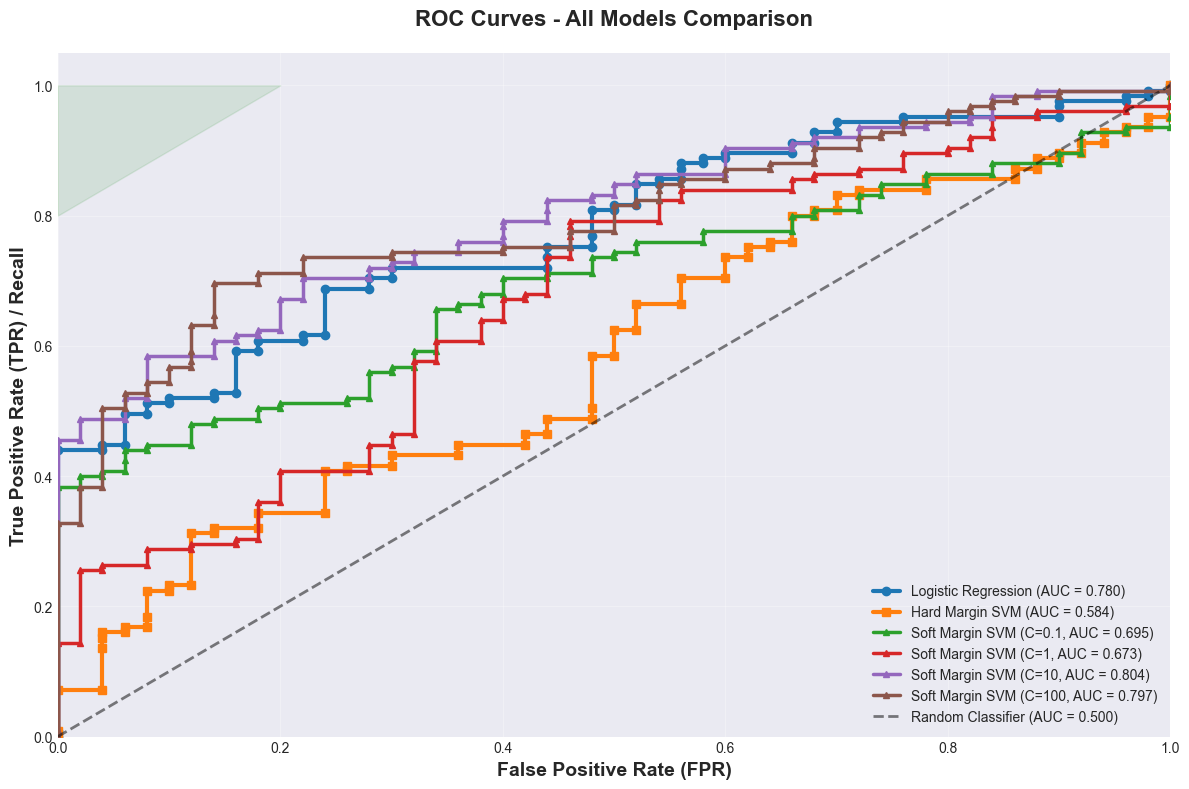


ROC CURVE INTERPRETATION:

📊 AUC Score Guide:
  • 0.9 - 1.0: Excellent (model distinguishes classes very well)
  • 0.8 - 0.9: Good (model has strong predictive power)
  • 0.7 - 0.8: Fair (model has moderate predictive ability)
  • 0.6 - 0.7: Poor (model barely better than random)
  • 0.5: Random guessing (no predictive power)

✓ ROC curves saved as 'roc_curves_comparison.png'


In [24]:
from sklearn.metrics import roc_curve, auc

print("="*70)
print("ROC CURVE ANALYSIS")
print("="*70)
print()

# Create figure
plt.figure(figsize=(12, 8))

# Plot for Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_proba_log)
roc_auc_log = auc(fpr_log, tpr_log)
plt.plot(fpr_log, tpr_log, color='#1f77b4', linewidth=3, 
         label=f'Logistic Regression (AUC = {roc_auc_log:.3f})', marker='o', markersize=6)
print(f"Logistic Regression - AUC: {roc_auc_log:.4f}")

# Plot for Hard Margin SVM
if y_pred_hard is not None:
    # Hard margin doesn't give probabilities directly, use decision function
    decision_hard = hard_svm.decision_function(X_test_scaled)
    fpr_hard, tpr_hard, _ = roc_curve(y_test, decision_hard)
    roc_auc_hard = auc(fpr_hard, tpr_hard)
    plt.plot(fpr_hard, tpr_hard, color='#ff7f0e', linewidth=3,
             label=f'Hard Margin SVM (AUC = {roc_auc_hard:.3f})', marker='s', markersize=6)
    print(f"Hard Margin SVM - AUC: {roc_auc_hard:.4f}")

# Plot for Soft Margin SVMs
soft_colors = ['#2ca02c', '#d62728', '#9467bd', '#8c564b']
for idx, C in enumerate(C_values):
    model = soft_svm_results[C]['model']
    decision_soft = model.decision_function(X_test_scaled)
    fpr_soft, tpr_soft, _ = roc_curve(y_test, decision_soft)
    roc_auc_soft = auc(fpr_soft, tpr_soft)
    plt.plot(fpr_soft, tpr_soft, color=soft_colors[idx], linewidth=2.5,
             label=f'Soft Margin SVM (C={C}, AUC = {roc_auc_soft:.3f})', 
             marker='^', markersize=5)
    print(f"Soft Margin SVM (C={C}) - AUC: {roc_auc_soft:.4f}")

# Plot diagonal reference line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier (AUC = 0.500)', alpha=0.5)

# Formatting
plt.xlabel('False Positive Rate (FPR)', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate (TPR) / Recall', fontsize=14, fontweight='bold')
plt.title('ROC Curves - All Models Comparison', fontsize=16, fontweight='bold', pad=20)
plt.legend(loc='lower right', fontsize=10, framealpha=0.9)
plt.grid(True, alpha=0.3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Add shaded region for excellent performance
plt.fill_between([0, 0.2], [0.8, 1], [1, 1], alpha=0.1, color='green', 
                 label='Excellent Region')

plt.tight_layout()
plt.savefig('roc_curves_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print()
print("="*70)
print("ROC CURVE INTERPRETATION:")
print("="*70)
print()
print("📊 AUC Score Guide:")
print("  • 0.9 - 1.0: Excellent (model distinguishes classes very well)")
print("  • 0.8 - 0.9: Good (model has strong predictive power)")
print("  • 0.7 - 0.8: Fair (model has moderate predictive ability)")
print("  • 0.6 - 0.7: Poor (model barely better than random)")
print("  • 0.5: Random guessing (no predictive power)")
print()
print("✓ ROC curves saved as 'roc_curves_comparison.png'")